# Customer Churn Prediction using Decision Trees

## First steps

In [4]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Download dataset from kaggle
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")
df = pd.read_csv(path + "/customer_churn_dataset-training-master.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## Data preprocessing

First of all we need to check our data for values which can distort our model.

### Missing values

In [6]:
# Check for missing values
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is 1 row full of NaN values. We need to drop it.

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

## Duplicates

In [9]:
df[df.duplicated()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


There is no duplicates so we can move on.

## Unnecessery Columns

In [10]:
df.drop("CustomerID", axis=1, inplace=True)

## Outliers

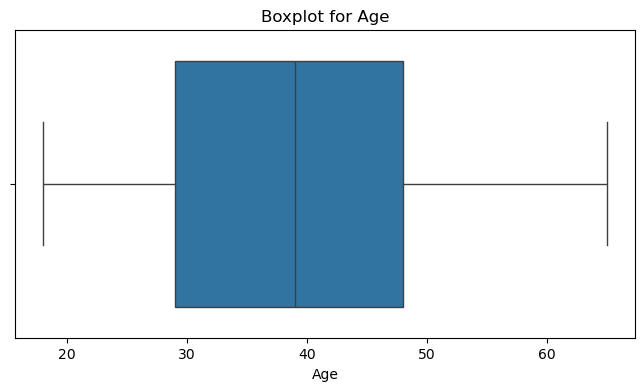

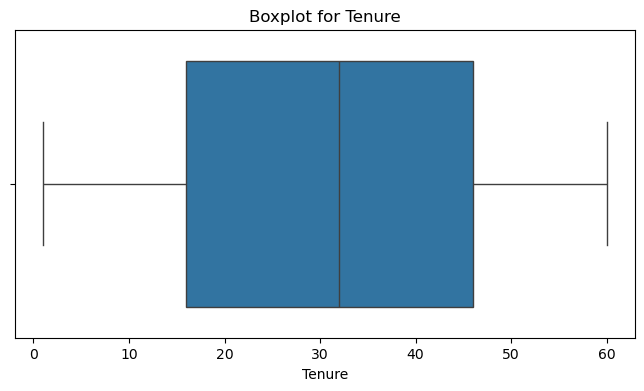

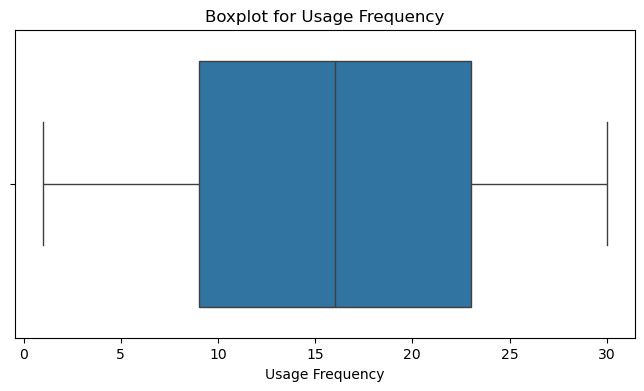

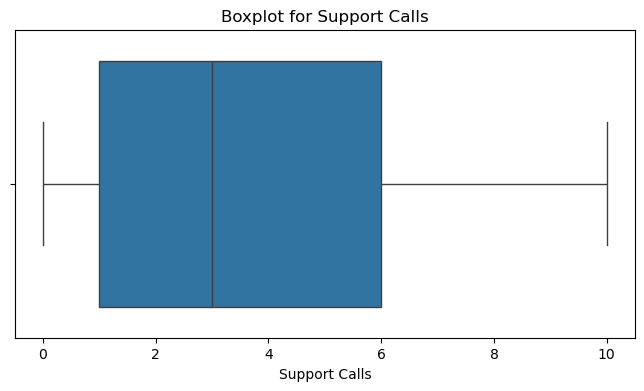

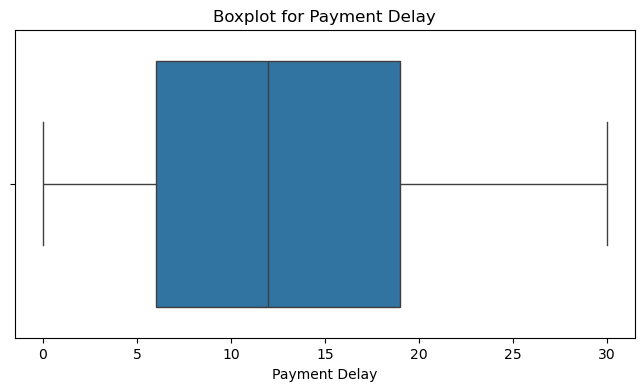

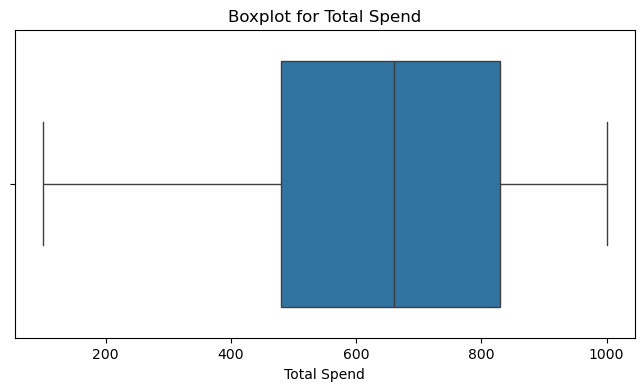

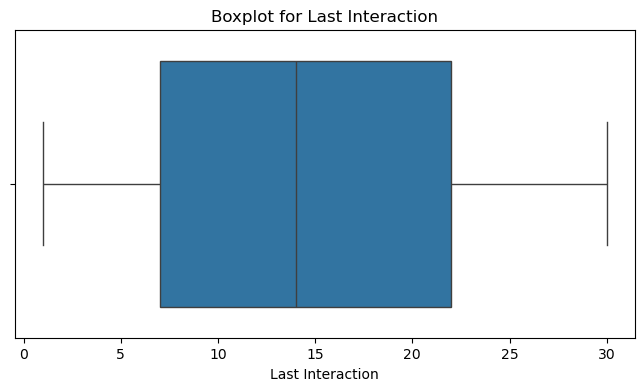

In [11]:
# Create Box plot for each numeric feature
numeric_features = df[['Age', 'Tenure', 'Usage Frequency',
                       'Support Calls', 'Payment Delay',
                       'Total Spend', 'Last Interaction']]

for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

All outliers are whithin acceptable levels.

## EDA

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [13]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


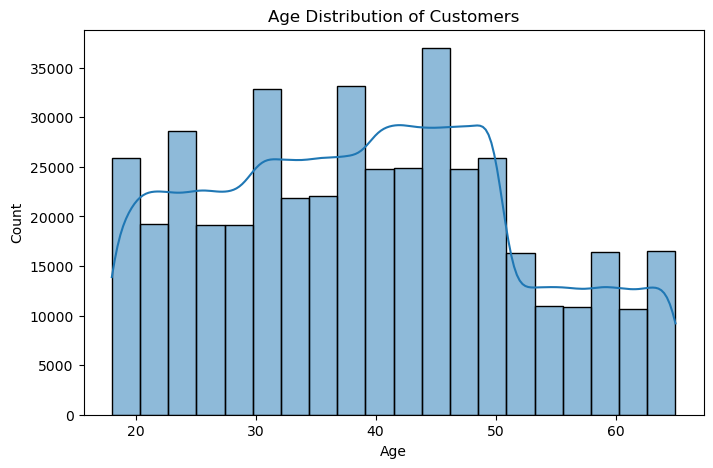

In [14]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

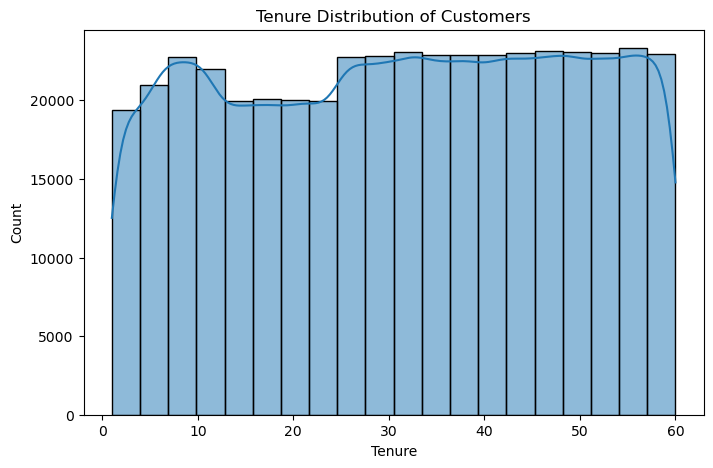

In [15]:
# Tenure Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Tenure"], bins=20, kde=True)
plt.title("Tenure Distribution of Customers")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

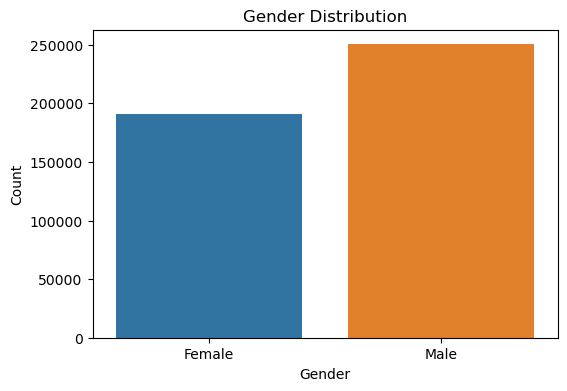

In [16]:
# Gender Proportion
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, hue="Gender")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

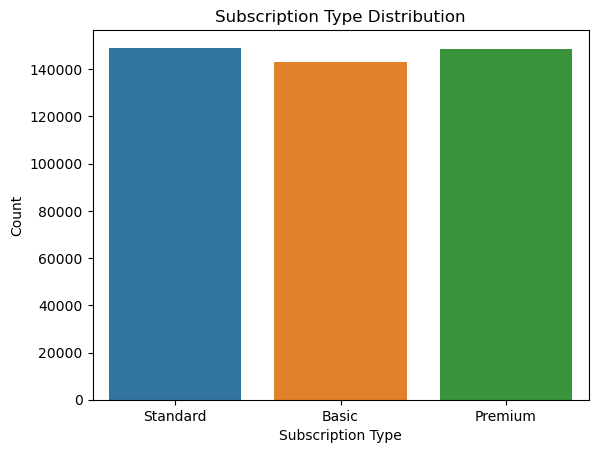

In [17]:
# Subscription Type Distribution
sns.countplot(x="Subscription Type", data=df, hue="Subscription Type")
plt.title("Subscription Type Distribution")
plt.xlabel("Subscription Type")
plt.ylabel("Count")
plt.show()

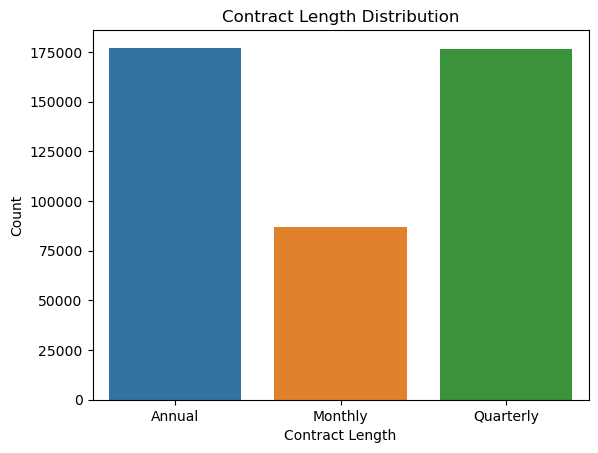

In [18]:
# Contract Length Distribution
sns.countplot(x="Contract Length", data=df, hue="Contract Length")
plt.title("Contract Length Distribution")
plt.xlabel("Contract Length")
plt.ylabel("Count")
plt.show()

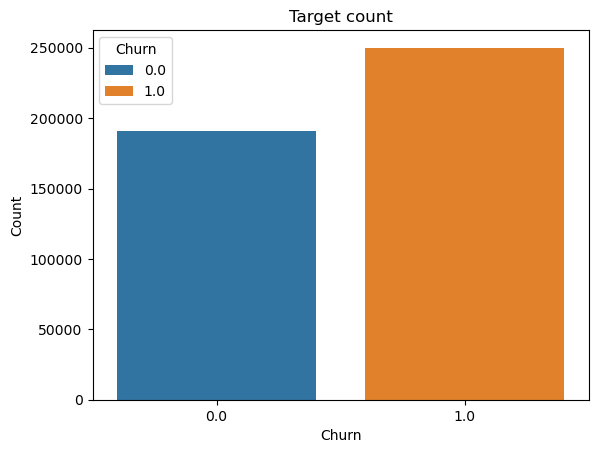

In [19]:
# Target balance
sns.countplot(x="Churn", data=df, hue="Churn")
plt.title("Target count")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

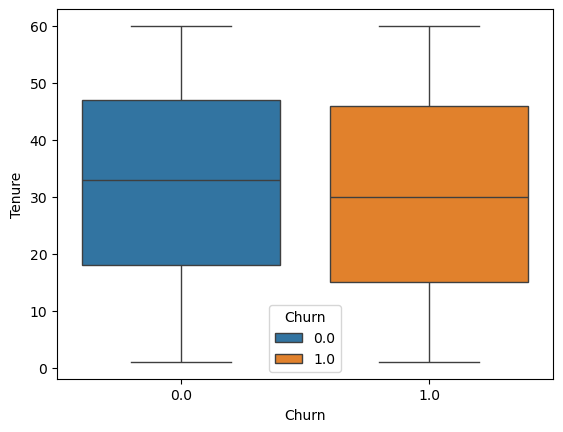

In [20]:
sns.boxplot(x="Churn", y="Tenure", data=df, hue="Churn")
plt.show()

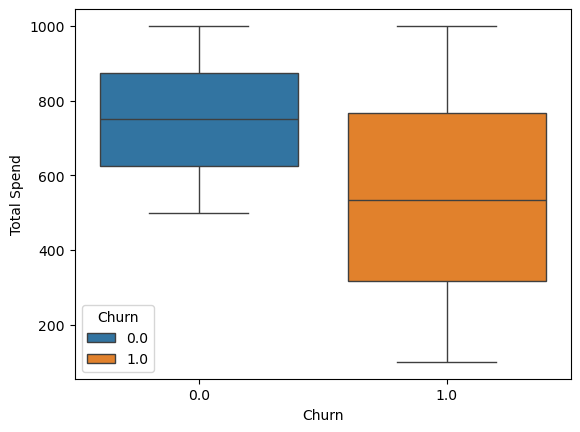

In [21]:
sns.boxplot(x="Churn", y="Total Spend", data=df, hue="Churn")
plt.show()

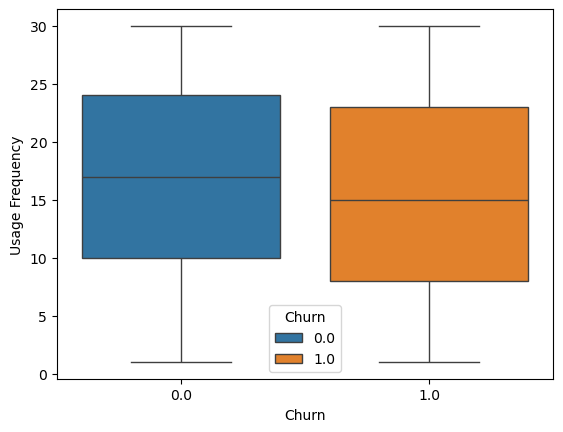

In [22]:
sns.boxplot(x="Churn", y="Usage Frequency", data=df, hue="Churn")
plt.show()

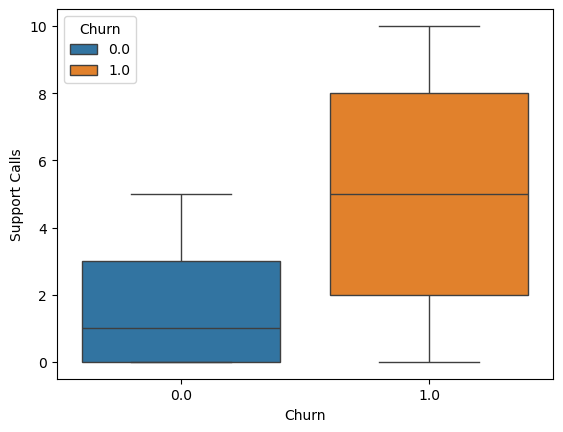

In [23]:
sns.boxplot(x="Churn", y="Support Calls", data=df, hue="Churn")
plt.show()

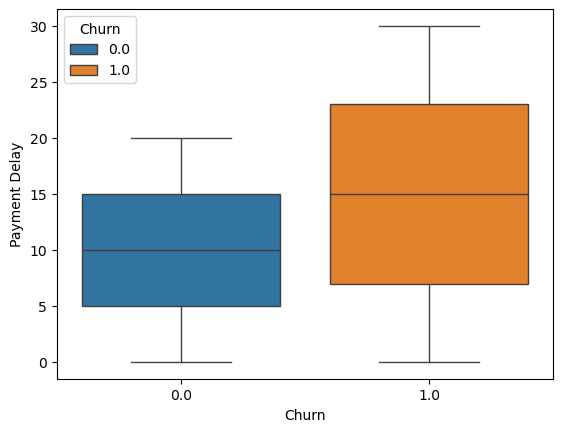

In [24]:
sns.boxplot(x="Churn", y="Payment Delay", data=df, hue="Churn")
plt.show()

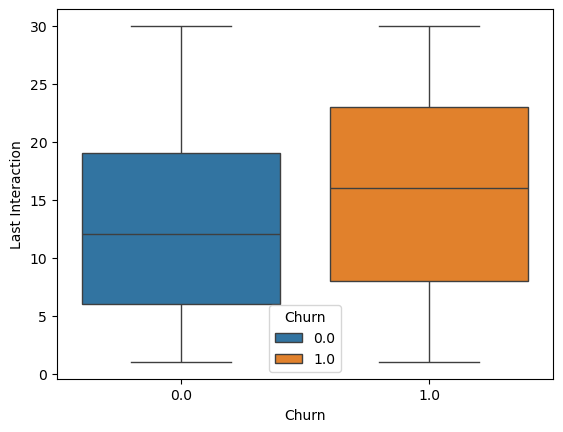

In [25]:
sns.boxplot(x="Churn", y="Last Interaction", data=df, hue="Churn")
plt.show()

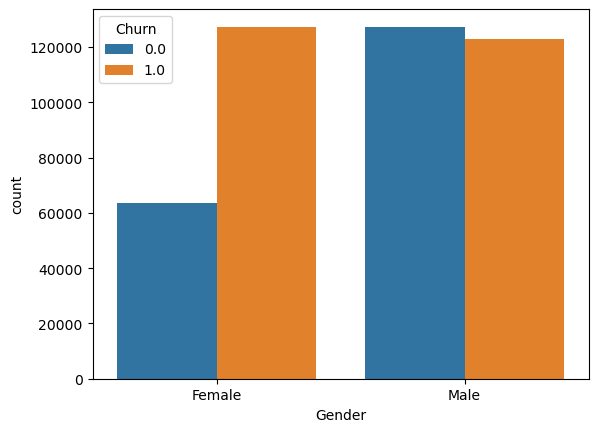

In [26]:
sns.countplot(x="Gender", hue="Churn", data=df)
plt.show()

<Axes: xlabel='Subscription Type', ylabel='count'>

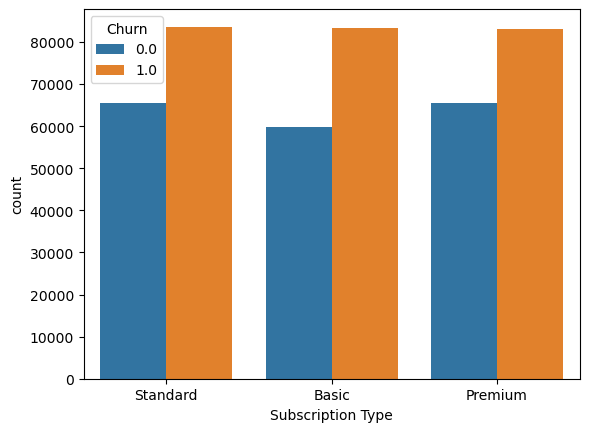

In [27]:
sns.countplot(x="Subscription Type", hue="Churn", data=df)

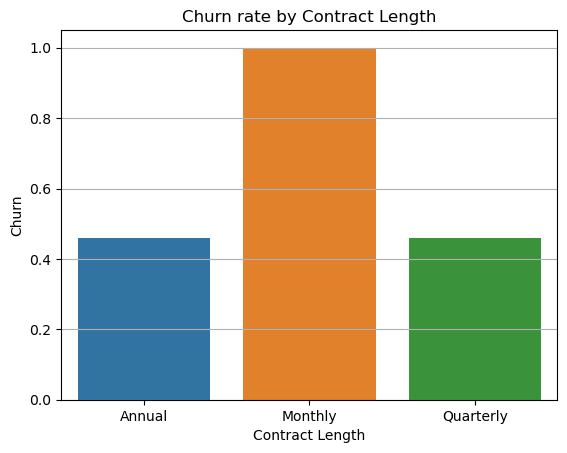

In [28]:
churn_contract_length = df.groupby("Contract Length")["Churn"].mean().reset_index()
sns.barplot(
    data=churn_contract_length,
    x="Contract Length",
    y="Churn",
    hue="Contract Length"
)
plt.grid(axis='y')
plt.title("Churn rate by Contract Length")
plt.show()

In [29]:
df["Age Group"] = pd.cut(df["Age"], bins=[0,25,40,60, 100],
                            labels=["<25","25-39","40-59","60+"])
age_churn = df.groupby("Age Group")["Churn"].mean() * 100
age_churn

/tmp/ipykernel_3517/972579544.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby("Age Group")["Churn"].mean() * 100


Age Group
<25       56.425498
25-39     47.747664
40-59     58.293344
60+      100.000000
Name: Churn, dtype: float64

In [30]:
df["Tenure Group"] = pd.cut(df["Tenure"], bins=[0, 1, 5, 12, 24, 60],
                            labels=["0", "0-5", "6-11", "12-23", "24-60"])
tenure_churn = df.groupby("Tenure Group")["Churn"].mean() * 100
tenure_churn

/tmp/ipykernel_3517/413525434.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby("Tenure Group")["Churn"].mean() * 100


Tenure Group
0        65.366006
0-5      64.206038
6-11     55.184444
12-23    63.272350
24-60    54.182987
Name: Churn, dtype: float64

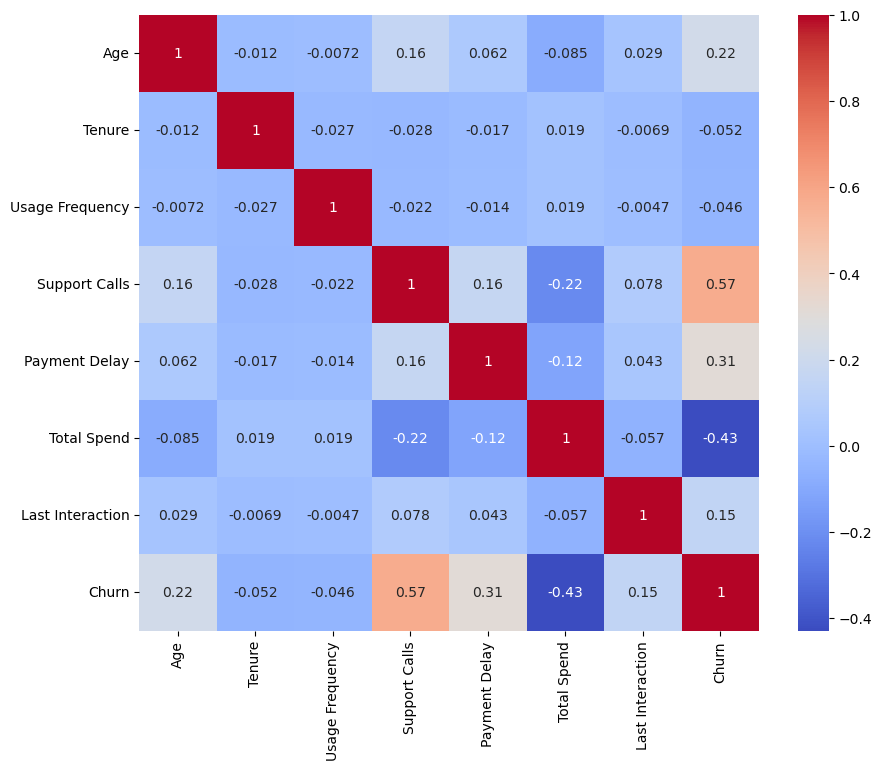

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## Encoding

We will use Label encoding for out categorial columns

In [77]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.iloc[:,:-2].copy()

cat_columns = ["Gender", "Subscription Type", "Contract Length"]
categoriacl_codes = {}
for cat_column in cat_columns:
    le = LabelEncoder()
    df_encoded[cat_column] = le.fit_transform(df[cat_column])
    categoriacl_codes = le

df_encoded.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


## Model Fitting

In [33]:
import graphviz
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [34]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

In [35]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

[Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) will help us to estimate model generalization skill.

In [36]:
dtc = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold()
scores = cross_val_score(dtc, X_train, y_train, cv=cv, scoring="f1")

print("Cross validation scores: ", scores)
print("Mean: ", scores.mean())

Cross validation scores:  [0.99988749 0.9997875  0.9997875  0.99978748 0.99982499]
Mean:  0.999814990061467


In [100]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=12, min_samples_leaf=50, min_samples_split=100)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=50,
                       min_samples_split=100)

Model Curve helps to examine whether model is overfitted or not.

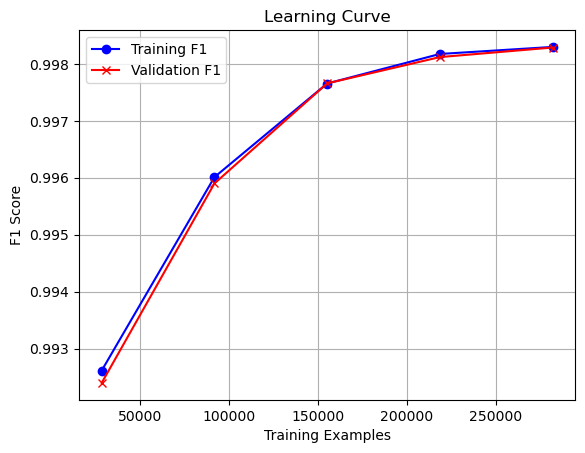

In [103]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training F1')
plt.plot(train_sizes, test_mean, color='red', marker='x', label='Validation F1')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('F1 Score')
plt.grid()

The proximity of the two curves suggests that the model generalizes well to unseen data. There is no large gap, which would indicate overfitting.

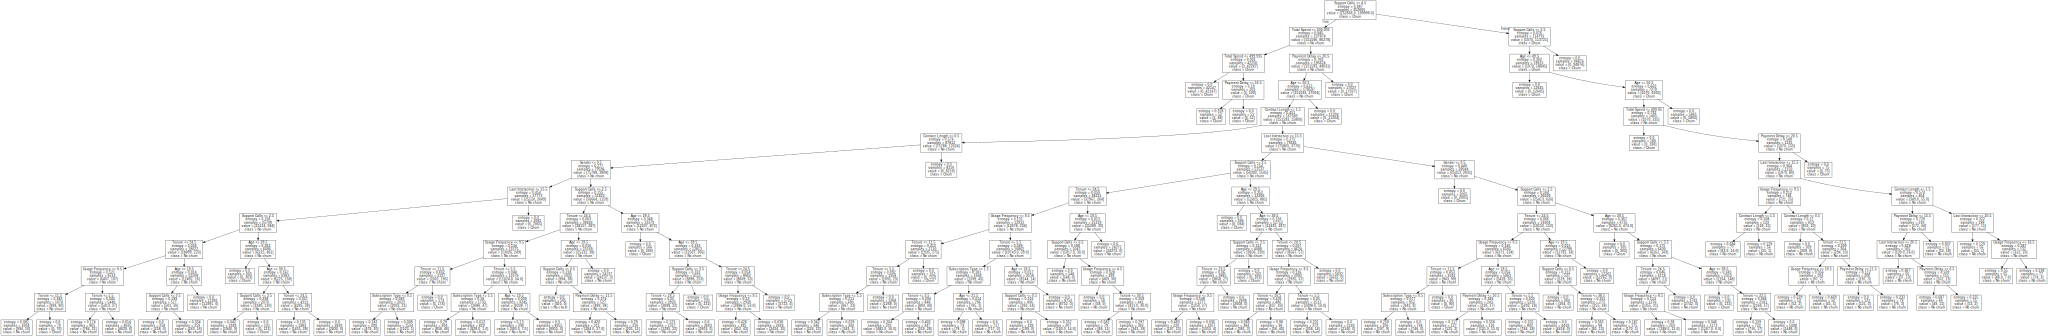

In [98]:
dot_data = export_graphviz(model, feature_names=X_train.columns, class_names=["No churn", "Churn"])
graph = graphviz.Source(dot_data, format="png")
graph

## Metrics

In [42]:
from sklearn.metrics import accuracy_score, f1_score

In [99]:
y_pred = model.predict(X_test)
print("accuracy: ", accuracy_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

accuracy:  0.9982759989565256
F1:  0.9984777775552306


## Conclusion

In this notebook we explored the prediction of customers churn using a Decision Tree classifier. We started with Data Preprocessing, did EDA, Encoding and trained a model to identify customers at risk of leaving. The model achieved high accuracy and F1-score, and the learning curve indicates strong generalization with minimal overfitting.